In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
total_duration = 30
clip_len = 3 #length of clip to visualise in seconds. Modify as you wish

#loading data sample. Feel free to try different spectrograms
spec = torch.from_numpy(np.load('ADL_DCASE_DATA/development/audio/a001_0_30.npy')) #residential area
spec2 = torch.from_numpy(np.load('ADL_DCASE_DATA/development/audio/a023_0_30.npy')) #beach
spec3 = torch.from_numpy(np.load('ADL_DCASE_DATA/development/audio/a017_0_30.npy')) #park
spec4 = torch.from_numpy(np.load('ADL_DCASE_DATA/development/audio/a005_0_30.npy')) #city centre
spec5 = torch.from_numpy(np.load('ADL_DCASE_DATA/development/audio/a030_0_30.npy')) #home
spec6 = torch.from_numpy(np.load('ADL_DCASE_DATA/development/audio/a039_0_30.npy')) #forest path
spec7 = torch.from_numpy(np.load('ADL_DCASE_DATA/development/audio/a045_0_30.npy')) #bus
spec8 = torch.from_numpy(np.load('ADL_DCASE_DATA/development/audio/a045_0_30.npy')) #grocery store
spec9 = torch.from_numpy(np.load('ADL_DCASE_DATA/development/audio/a053_0_30.npy')) #cafe/restaurant
spec10 = torch.from_numpy(np.load('ADL_DCASE_DATA/development/audio/b025_0_30.npy')) #library
spec11 = torch.from_numpy(np.load('ADL_DCASE_DATA/development/audio/a099_0_30.npy')) #office
spec12 = torch.from_numpy(np.load('ADL_DCASE_DATA/development/audio/a095_30_60.npy')) #car
spec13 = torch.from_numpy(np.load('ADL_DCASE_DATA/development/audio/a089_0_30.npy')) #metro_station
spec14 = torch.from_numpy(np.load('ADL_DCASE_DATA/development/audio/a075_0_30.npy')) #train
spec15 = torch.from_numpy(np.load('ADL_DCASE_DATA/development/audio/a076_30_60.npy')) #tram

In [3]:
#getting subsection of spec determined by clip_len
time_steps = spec.size(-1)
num_clips = total_duration // clip_len
time_interval = int(time_steps // num_clips)
spec = spec[:, :time_interval]
spec2 = spec2[:, :time_interval]
spec3 = spec3[:, :time_interval]
spec4 = spec4[:, :time_interval]
spec5 = spec5[:, :time_interval]
spec6 = spec6[:, :time_interval]
spec7 = spec7[:, :time_interval]
spec8 = spec8[:, :time_interval]
spec9 = spec9[:, :time_interval]
spec10 = spec10[:, :time_interval]
spec11 = spec11[:, :time_interval]
spec12 = spec12[:, :time_interval]
spec13 = spec13[:, :time_interval]
spec14 = spec14[:, :time_interval]
spec15 = spec15[:, :time_interval]

residential area


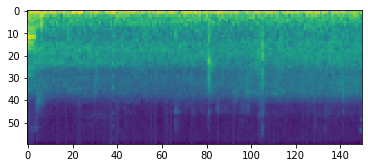

In [4]:
#Visualising spectrogram
plt.imshow(spec.numpy())
print('residential area')

beach


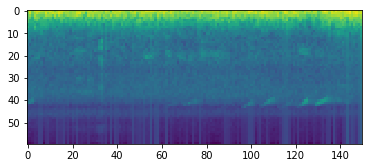

In [5]:
plt.imshow(spec2.numpy())
print('beach')

park


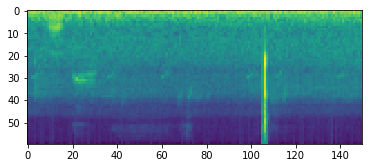

In [6]:
plt.imshow(spec3.numpy())
print('park')

city centre


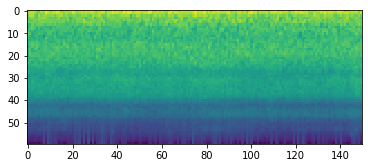

In [7]:
plt.imshow(spec4.numpy())
print('city centre')

home


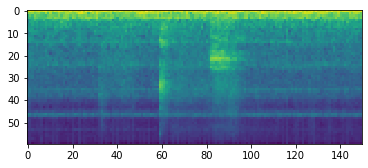

In [8]:
plt.imshow(spec5.numpy())
print('home')

forest path


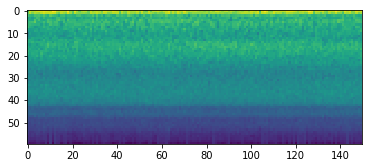

In [9]:
plt.imshow(spec6.numpy())
print('forest path')

bus


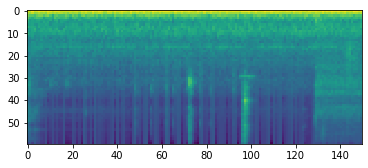

In [10]:
plt.imshow(spec7.numpy())
print('bus')

grocery store


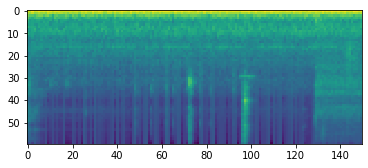

In [11]:
plt.imshow(spec8.numpy())
print('grocery store')

cafe/restaurant


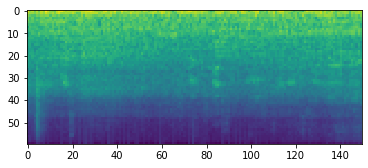

In [12]:
plt.imshow(spec9.numpy())
print('cafe/restaurant')

library


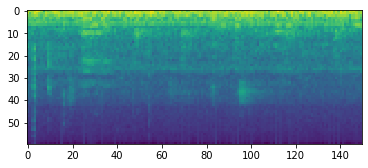

In [13]:
plt.imshow(spec10.numpy())
print('library')

office


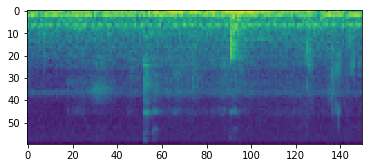

In [14]:
plt.imshow(spec11.numpy())
print('office')

car


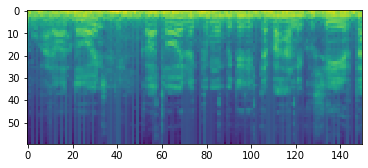

In [15]:
plt.imshow(spec12.numpy())
print('car')

metro station


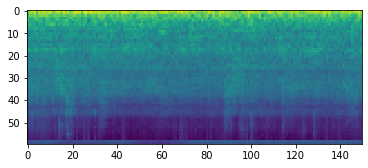

In [16]:
plt.imshow(spec13.numpy())
print('metro station')

train


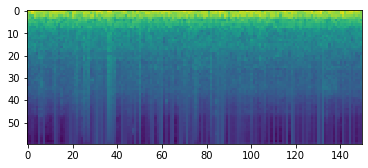

In [17]:
plt.imshow(spec14.numpy())
print('train')

tram


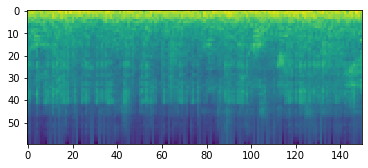

In [18]:
plt.imshow(spec15.numpy())
print('tram')